In [16]:
import yfinance as yf
import pandas as pd
from resources.chart.yprint import *
from resources.financials import stockanalysis
from resources.chart.datasets import *
from resources.financials import profitmgr
from resources.datetimeutil import datetimemgr
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from pandas import DatetimeIndex


In [17]:
symbols = get_snp500_tickers_from_wiki()
symbols = symbols[:10]
len(symbols)

10

In [18]:
tickers = yf.Tickers(symbols)
tickers_dict = tickers.__dict__.get('tickers')

1. Valid periods: [1d, 1mo, 1y]
2. Valid intervals: [1m, 2m, 5m, 15m, 30m, 60m, 90m, 1h, 1d, 5d, 1wk, 1mo, 3mo]

In [19]:
df = tickers.download(period='1mo', interval='30m', group_by='ticker')

[*********************100%***********************]  10 of 10 completed


In [20]:
df

MMM                                      \
                                 Open        High         Low       Close   
Datetime                                                                    
2022-05-27 15:00:00-04:00  148.699997  149.220001  148.699997  149.149994   
2022-05-27 15:30:00-04:00  149.119995  149.520004  149.000000  149.520004   
2022-05-31 09:30:00-04:00  148.270004  149.289993  145.929993  146.600006   
2022-05-31 10:00:00-04:00  146.610001  147.360001  146.360001  147.119995   
2022-05-31 10:30:00-04:00  147.110001  147.449997  147.089996  147.309998   
...                               ...         ...         ...         ...   
2022-06-27 13:00:00-04:00  133.589996  133.589996  132.889999  133.199997   
2022-06-27 13:30:00-04:00  133.175003  133.184998  132.660004  133.000000   
2022-06-27 14:00:00-04:00  132.994995  133.020004  132.789993  132.863998   
2022-06-27 14:30:00-04:00  132.860001  133.000000  132.589996  132.750000   
2022-06-27 15:00:00-04:00         NaN         NaN         NaN         NaN   

                                                                  ABMD  \
                             Volume Dividends Stock Splits        Open   
Datetime                                                                 
2022-05-27 15:00:00-04:00   97709.0       0.0          0.0  265.399994   
2022-05-27 15:30:00-04:00  297224.0       0.0          0.0  266.989990   
2022-05-31 09:30:00-04:00  342147.0       0.0          0.0  263.940002   
2022-05-31 10:00:00-04:00  152678.0       0.0          0.0  260.269989   
2022-05-31 10:30:00-04:00  122192.0       0.0          0.0  261.290009   
...                             ...       ...          ...         ...   
2022-06-27 13:00:00-04:00  181229.0       0.0          0.0  255.779999   
2022-06-27 13:30:00-04:00  124327.0       0.0          0.0  256.399994   
2022-06-27 14:00:00-04:00  114643.0       0.0          0.0  254.779999   
2022-06-27 14:30:00-04:00  124737.0       0.0          0.0  255.729996   
2022-06-27 15:00:00-04:00       NaN       NaN          NaN         NaN   

                                                   ...    ABBV            \
                                 High         Low  ...  Volume Dividends   
Datetime                                           ...                     
2022-05-27 15:00:00-04:00  267.079987  265.399994  ...  424216         0   
2022-05-27 15:30:00-04:00  267.290009  264.829987  ...  925841         0   
2022-05-31 09:30:00-04:00  265.005005  256.130005  ...  657257         0   
2022-05-31 10:00:00-04:00  263.174988  259.059998  ...  280778         0   
2022-05-31 10:30:00-04:00  262.790009  261.239990  ...  236903         0   
...                               ...         ...  ...     ...       ...   
2022-06-27 13:00:00-04:00  256.440002  255.000000  ...  185418         0   
2022-06-27 13:30:00-04:00  256.399994  254.880005  ...  181921         0   
2022-06-27 14:00:00-04:00  256.070007  254.779999  ...  233917         0   
2022-06-27 14:30:00-04:00  256.274994  255.729996  ...  172782         0   
2022-06-27 15:00:00-04:00         NaN         NaN  ...       0         0   

                                               ACN                          \
                          Stock Splits        Open        High         Low   
Datetime                                                                     
2022-05-27 15:00:00-04:00            0  302.619995  304.000000  302.549988   
2022-05-27 15:30:00-04:00            0  303.420013  304.170013  302.799988   
2022-05-31 09:30:00-04:00            0  302.399994  303.320007  296.700012   
2022-05-31 10:00:00-04:00            0  299.910004  300.625000  298.309998   
2022-05-31 10:30:00-04:00            0  299.690002  301.079987  299.630005   
...                                ...         ...         ...         ...   
2022-06-27 13:00:00-04:00            0  293.910004  294.149994  292.989990   
2022-06-27 13:30:00-04:00            0  293.255005  293.489990  293.00000

<AxesSubplot:xlabel='Datetime'>

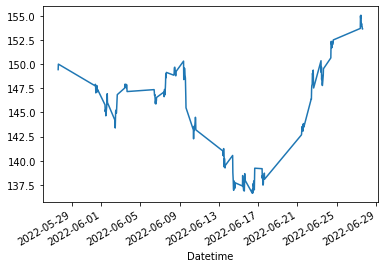

In [21]:
df['ABBV']['Close'].plot()


In [22]:
dates = df.index
dates

DatetimeIndex(['2022-05-27 15:00:00-04:00', '2022-05-27 15:30:00-04:00',
               '2022-05-31 09:30:00-04:00', '2022-05-31 10:00:00-04:00',
               '2022-05-31 10:30:00-04:00', '2022-05-31 11:00:00-04:00',
               '2022-05-31 11:30:00-04:00', '2022-05-31 12:00:00-04:00',
               '2022-05-31 12:30:00-04:00', '2022-05-31 13:00:00-04:00',
               ...
               '2022-06-27 10:30:00-04:00', '2022-06-27 11:00:00-04:00',
               '2022-06-27 11:30:00-04:00', '2022-06-27 12:00:00-04:00',
               '2022-06-27 12:30:00-04:00', '2022-06-27 13:00:00-04:00',
               '2022-06-27 13:30:00-04:00', '2022-06-27 14:00:00-04:00',
               '2022-06-27 14:30:00-04:00', '2022-06-27 15:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Datetime', length=248, freq=None)

In [23]:
datetimemgr.Datetime_range_stock(dates,'2022-06-25','2022-06-27')

DatetimeIndex(['2022-06-27 09:30:00-04:00', '2022-06-27 10:00:00-04:00',
               '2022-06-27 10:30:00-04:00', '2022-06-27 11:00:00-04:00',
               '2022-06-27 11:30:00-04:00', '2022-06-27 12:00:00-04:00',
               '2022-06-27 12:30:00-04:00', '2022-06-27 13:00:00-04:00',
               '2022-06-27 13:30:00-04:00', '2022-06-27 14:00:00-04:00',
               '2022-06-27 14:30:00-04:00', '2022-06-27 15:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Datetime', freq=None)

In [24]:
datetimemgr.Datetime_range_close_stock(dates,'2022-06-25','2022-06-27')

DatetimeIndex(['2022-06-27 15:00:00-04:00'], dtype='datetime64[ns, America/New_York]', freq=None)

In [25]:
profitmgr.profit_percent_stocks(df, ['ABBV','ADBE','ADM'], ['Close'], '2022-06-22', '2022-06-27')

,Close
ABBV,4.141531
ADBE,NaN
ADM,NaN


In [26]:
profitmgr.profit_percent_avg_stocks(df, ['ABBV', 'ADBE', 'ADM'], ['Close'], '2022-06-22', '2022-06-27')


,Close
ABBV,2.953073
ADBE,NaN
ADM,NaN


pandas.core.series.Series

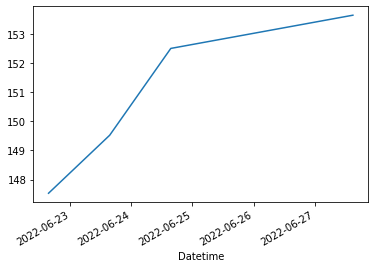

In [27]:
type(stockanalysis.stock_history(df,'ABBV', 'Close', '2022-06-22', '2022-06-27',True))

In [28]:
profitmgr.best_stocks(df,['ABBV','ADM','ADBE'],['Open','Close'],'2022-06-10', '2022-06-25',3,False,False)

,Open,Close
ABBV,5.559217,6.494416
ADBE,-3.748643,-1.483174
ADM,-12.648410,-12.009917


In [41]:
abbv = tickers_dict['ABBV']
abbv.balancesheet

,2021-12-31,2020-12-31,2019-12-31,2018-12-31
Intangible Assets,7.595100e+10,8.287600e+10,1.864900e+10,2.123300e+10
Capital Surplus,1.830500e+10,1.738400e+10,1.519300e+10,1.475600e+10
Total Liab,1.310930e+11,1.374680e+11,9.728700e+10,6.779800e+10
Total Stockholder Equity,1.540800e+10,1.307600e+10,-8.172000e+09,-8.446000e+09
Minority Interest,2.800000e+07,2.100000e+07,NaN,NaN
Other Current Liab,8.932000e+09,8.354000e+09,4.631000e+09,5.355000e+09
Total Assets,1.465290e+11,1.505650e+11,8.911500e+10,5.935200e+10
Common Stock,1.800000e+07,1.800000e+07,1.800000e+07,1.800000e+07
Other Current Assets,2.260000e+08,5.100000e+07,2.200000e+07,1.320000e+08
Retained Earnings,3.127000e+09,1.055000e+09,4.717000e+09,3.368000e+09
